# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Кирильцев Даниил. Вариант №7

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие,
        
$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.
        
**Цензус диад** — тройка чисел <M, A, N>, где:
        
$M = \sum_{i<j} X_{ij} X_{ji}$
        
$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна

 $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе 

$p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

$M_{\max} = \lfloor\frac{1}{2}(\sum_{i=1}^gx_{i+}-\max_{0 \leqslant t \leqslant g}g(t))\rfloor$
, где 

$f(t)=\sum_{i=1}^tx_{i+}-t(g-1)-(^t_2)$

$g(t)=\sum_{i=1}^tx_{i+}-t(t-1)-\sum_{i=t+1}^g\min(t,x_{i+})$

**Нулевые гипотезы**
 Для равномерного распределения

$H_0: L \sim B(g(g-1), \frac{1}{2})$

Статистика

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

Для распределени Бернулли

$H_0 : L \sim B(g(g-1), P_0)$

Статистика

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

**Доверительный интервал**

Оценка $P$

$P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$

Доверительный интервал:

$P_{lower} \leqslant P \leqslant P_{upper}$

$P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

$P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

In [131]:
#install.packages("igraph")

In [132]:
library("igraph")

In [133]:
# 7 вариант
g <- 94
p <- 0.77
p0 <- 0.78
alpha <- 0.01

set.seed(353)

## Выполнение работы


### 1. С помощью библиотеки igraph смоделировать случайный орграф $\mathcal{G}_d$ на основе модели Эрдеша—Реньи: $\mathcal{G}_d  = \mathcal{G}(g, p)$, где $g$ – количество акторов, $p$ – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [134]:
random_graph <- erdos.renyi.game(
    n=g,
    p.or.m = p,
    type = "gnp",
    directed = TRUE,
    loops = FALSE
)

#### Описание модели:
Приведенная выше модель графа строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность, вычисляемую по формуле:

${\displaystyle p^{M}(1-p)^{{С_n^2}-M}}$

### 2. Отобразить полученный орграф.

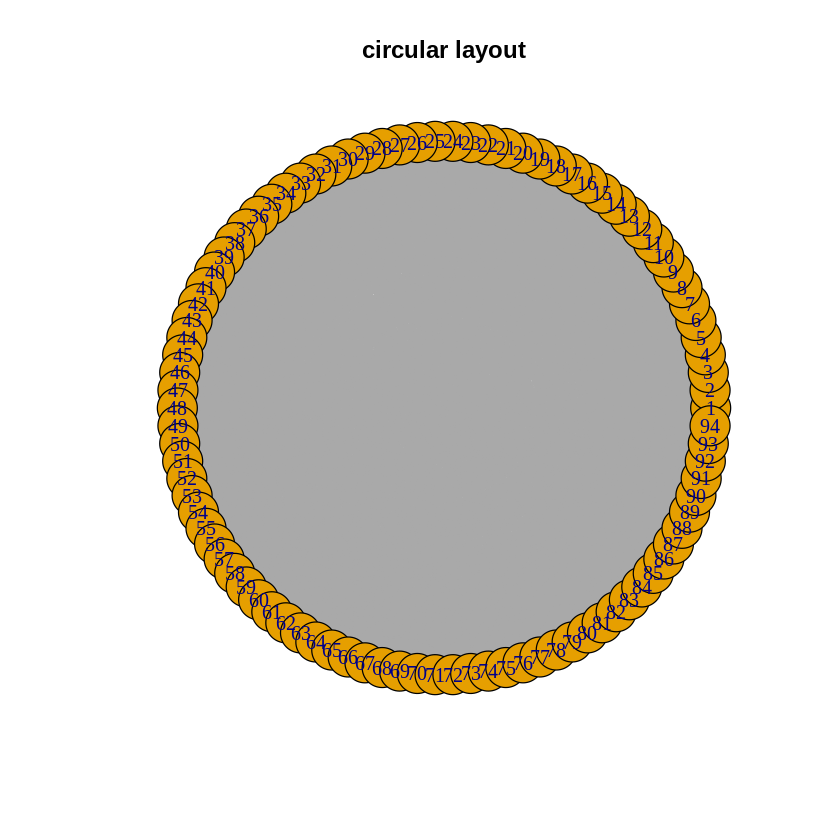

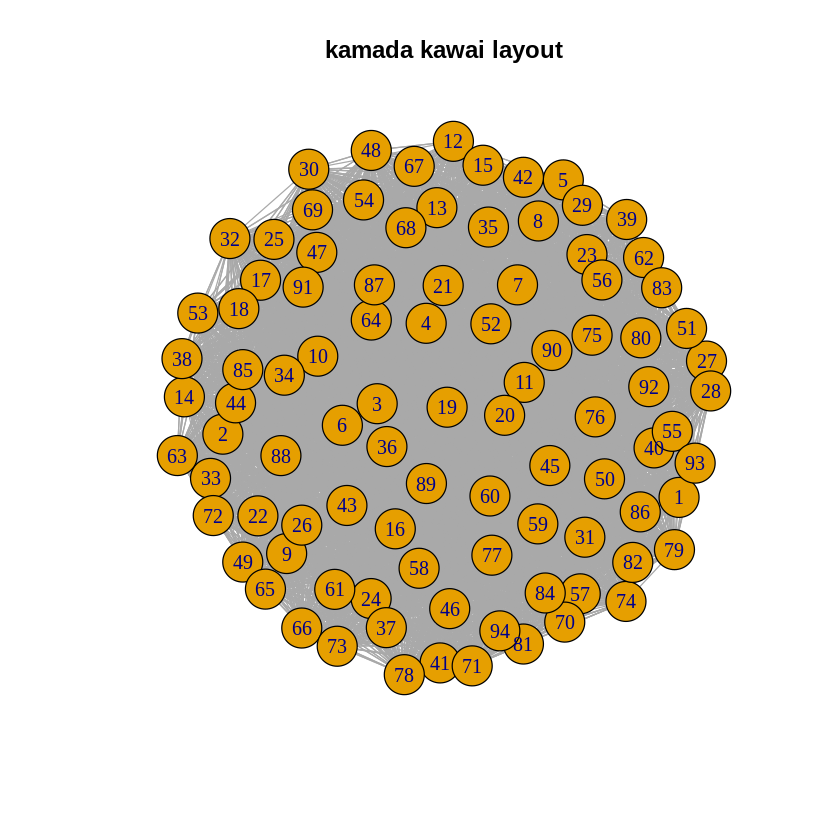

In [135]:

plot(
    x=random_graph,
    edge.arrow.size=0.01,
    layout=layout.circle(random_graph),
    main='circular layout',
    )
plot(
    x=random_graph,
    edge.arrow.size=0.01,
    layout=layout.kamada.kawai(random_graph),
    main='kamada kawai layout'
    )

### 3. Вычислить «пятичисловую сводку» для графа $\mathcal{G}_d$.

In [136]:
cat(gorder(random_graph) ,'(Размер сети)\n')
cat(edge_density(random_graph, loops = FALSE) ,'(Плотность)\n')
cat(components(random_graph)$no ,'(Число компонент)\n')
cat(diameter(random_graph) ,'(Диаметр сети)\n')
cat(transitivity(random_graph) ,'(Коэффициент кластеризации)\n')

94 (Размер сети)
0.7656143 (Плотность)
1 (Число компонент)
2 (Диаметр сети)
0.9505653 (Коэффициент кластеризации)


### 4. Вычислить цензус диад. Сделать выводы.

In [137]:
dc <- dyad.census(random_graph)
dc

$mut
[1] 2538

$asym
[1] 1617

$null
[1] 216

#### Выводы:
Числовые характеристики цензуса диад отображают тенденцию акторов к взаимности. В данном графе 2562 взаимные диады, 1587 ассиметричных диад и 222 нуль-диады
(Акторы в сети склонны взаимодействовать между собой)

### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [138]:
X <- as_adjacency_matrix(random_graph, sparse=FALSE)
M <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        if (i < j){
            M <- M + X[i,j]*X[j,i]
        }
    }
}
M == dc$mut # For this type of the graphs it must be true
M

[1] TRUE

[1] 2538

In [139]:
L <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        L <- L + X[i,j]
    }
}
L == gsize(random_graph) # For this type of the graphs it must be true
L

[1] TRUE

[1] 6693

In [140]:
L_2 <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        L_2 <- L_2 + (X[i,j])^2
    }
}
L == L_2 # For this type of the graphs it must be true
L_2

[1] TRUE

[1] 6693

In [141]:
d <- 73



p.kp <- (2*(gorder(random_graph)-1) * M - gorder(random_graph) * d^2)/(gorder(random_graph) * d * (gorder(random_graph)-1-d))
cat(p.kp ,' Коэффициент Каца-Пауэла для d = 65\n')

p.kp.free <- (2*((gorder(random_graph)-1)^2) * M - (L^2) + L_2)/ (L*(gorder(random_graph)-1)^2 - (L^2) + L_2)
cat(p.kp.free ,' Коэффициент Каца-Пауэла при свободном выборе\n')

-0.210274  Коэффициент Каца-Пауэла для d = 65
-0.06773694  Коэффициент Каца-Пауэла при свободном выборе


#### Выводы:
Коэффициент Каца-Пауэла нужен, чтобы объединить M, A, N в одну ЧХ.
При d = 70 и свободном выборе, акторы склонны смещаться к образованию нуль и ассиметричных диад.

### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [142]:
fixed <- d/(g - 1) * (d/(g - 1) + p.kp * (g - 1 - d)/(g - 1))
free <- d/(g - 1) * (d/(g - 1) + p.kp.free * (g - 1 - d)/(g - 1))
print(fixed)
print(free)

[1] 0.5806452
[1] 0.6047062


### 7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [143]:
reciprocity(random_graph)

[1] 0.7584043

#### Выводы: Опираясь на полученный выше индекс мы можем утверждать, что акторы склонны образовывать взаимные связи

### 8. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

#### <center> $H_0 : n = g(g-1)$
#### <center> $H_0 : n \neq g(g-1)$
#### <center> Two-tailed Z-test

In [144]:
n <- g * (g - 1)
p <- 0.5

Z_score <- abs((sum(X) - n*p))/sqrt(n*p*(1-p))
Z_score

[1] 49.66916

#### Вывод:
Опираясь на посчитанный z_score = 49.67, максимальный уровень значимости при
котором нулевая гипотеза не отвергается = 0 

### 9. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), $P_0$) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [145]:
Z_score_2 <- (sum(X) - p0 * n)/sqrt(p0 * (1-p0) * n)
Z_score_2

[1] -3.246972

Опираясь на посчитанный z_score = -3.25, максимальный уровень значимости при
котором нулевая гипотеза не отвергается = 0.001166  

### 10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [149]:
p_cap <- sum(X)/(g*(g-1))
z_alpha_over_two <- 0.0125334695
p_lower <- p_cap - z_alpha_over_two * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
p_upper <- p_cap + z_alpha_over_two * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
p_lower
p_upper

[1] 0.7655575

[1] 0.7656711

Выводы:
С вероятностью 99% интервал от 0.765557490534552 до 0.765671061284253 накрывает истинное значение параметра p

#### Выводы:

Также можно (и нужно) вставлять таблицы. [Удобный сайт для создания Markdown-таблиц.](https://www.tablesgenerator.com/markdown_tables "Markdown Tables generator")

Не забывайте проанализировать полученные результаты.

## Выводы

Используя математический пакет igraph и основные конструкции языка R был проведен диадический [индексы каца-пауэла, Бандиопадхьяйя], классический анализ [визуализацияб 5-числовая сводкя] и статистический анализ [проверка гипотез, доверительный интервал] сети. Данные инструменты позволили изввлечь из сети большое количество скрытой информации.